In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = np.arange(10, 600, 10)

In [3]:
batch_size_memory_nsde_1 = torch.load('nsde_sigwgan/batch_size_memory.pt')
batch_size_time_nsde_1 = torch.load('nsde_sigwgan/batch_size_time.pt')

batch_size_memory_nsde_2 = torch.load('nsde_sigwgan/batch_size_memory_2.pt')
batch_size_time_nsde_2 = torch.load('nsde_sigwgan/batch_size_time_2.pt')

batch_size_memory_lstmsig = torch.load('lstm_sigwgan/batch_size_memory.pt')
batch_size_time_lstmsig = torch.load('lstm_sigwgan/batch_size_time.pt')

batch_size_memory_lstm = torch.load('lstm_wgan/batch_size_memory.pt')
batch_size_time_lstm = torch.load('lstm_wgan/batch_size_time.pt')


In [4]:
batch_size_memory_nsde_1 = torch.mean(batch_size_memory_nsde_1, dim=1)
batch_size_time_nsde_1 = torch.mean(batch_size_time_nsde_1, dim=1)

batch_size_memory_nsde_2 = torch.mean(batch_size_memory_nsde_2, dim=1)
batch_size_time_nsde_2 = torch.mean(batch_size_time_nsde_2, dim=1)

batch_size_memory_lstmsig = torch.mean(batch_size_memory_lstmsig, dim=1)[:27]
batch_size_time_lstmsig = torch.mean(batch_size_time_lstmsig, dim=1)[:27]

batch_size_memory_lstm = torch.mean(batch_size_memory_lstm, dim=1)
batch_size_time_lstm = torch.mean(batch_size_time_lstm, dim=1)

In [5]:
# The time per step of the LSTM-WGAN seems to sumble around. However, it does not look to have a trend. To make it nicer, 
#we smooth it

In [6]:
mean_wgan_time = torch.mean(batch_size_time_lstm)

In [7]:
mean_wgan_time = torch.ones(batch_size.shape)*mean_wgan_time

In [23]:
batch_size[25]

260

In [33]:
b = [mean_wgan_time[0], batch_size_time_lstmsig[25], batch_size_time_nsde_1[25]]

In [34]:
a = [batch_size_memory_lstm[0], batch_size_memory_lstmsig[25], batch_size_memory_nsde_1[25]]

In [ ]:
ax.set_xticks(ind, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

In [46]:
ind = np.array([0,1,2])

In [ ]:
['LSTM WGAN', 'LSTM CSig-WGAN', 'NSDE Csig-WGAN']

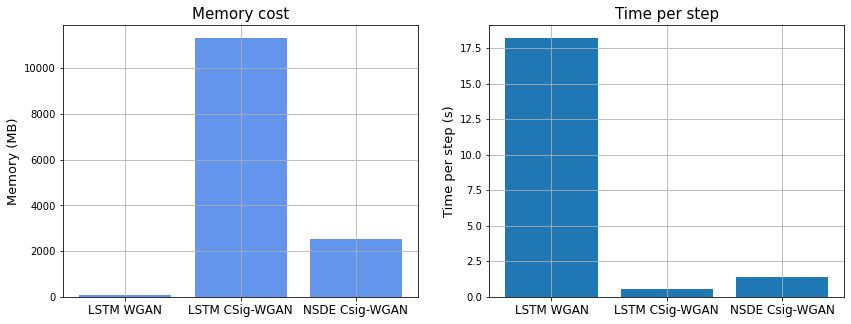

In [57]:
plt.rcParams['figure.figsize'] = [14, 5]
fig, axs = plt.subplots(1,2)
B = axs[0].bar(ind, a, color='cornflowerblue')
B = axs[1].bar(ind, b)
B = axs[0].grid()
B = axs[1].grid()
B = axs[0].set_ylabel('Memory (MB)', fontsize=13)
B = axs[1].set_ylabel('Time per step (s)', fontsize=13)
B = axs[0].set_xticks(ind, ['LSTM WGAN', 'LSTM CSig-WGAN', 'NSDE Csig-WGAN'], fontsize=12)
B = axs[1].set_xticks(ind, ['LSTM WGAN', 'LSTM CSig-WGAN', 'NSDE Csig-WGAN'], fontsize=12)
B  =axs[0].set_title('Memory cost', fontsize=15)
B  =axs[1].set_title('Time per step', fontsize=15)

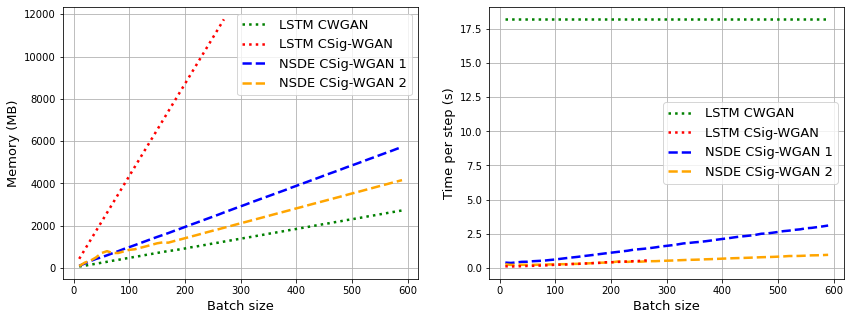

In [15]:
plt.rcParams['figure.figsize'] = [14, 5]
fig, axs = plt.subplots(1,2)

plt.rcParams['figure.figsize'] = [8, 5]
a = axs[0].plot(batch_size, batch_size_memory_lstm, label='LSTM CWGAN', linewidth=2.5, alpha=1, ls='dotted', color='green')
a = axs[0].plot(batch_size[:27], batch_size_memory_lstmsig, label='LSTM CSig-WGAN', linewidth=2.5, alpha=1, ls='dotted', color='red')
a = axs[0].plot(batch_size, batch_size_memory_nsde_1, label='NSDE CSig-WGAN 1', linewidth=2.5, alpha=1, ls='--', color='blue')
a = axs[0].plot(batch_size, batch_size_memory_nsde_2, label='NSDE CSig-WGAN 2', linewidth=2.5, alpha=1, ls='--', color='orange')

a = axs[0].legend(fontsize=13)
a = axs[0].grid()
a = axs[0].set_xlabel('Batch size', fontsize=13)
a = axs[0].set_ylabel('Memory (MB)', fontsize=13)

a = axs[1].plot(batch_size, mean_wgan_time, label='LSTM CWGAN', linewidth=2.5, alpha=1, ls='dotted', color='green')
a = axs[1].plot(batch_size[:27], batch_size_time_lstmsig, label='LSTM CSig-WGAN', linewidth=2.5, zorder=4, ls='dotted', color='red')
a = axs[1].plot(batch_size, batch_size_time_nsde_1, label='NSDE CSig-WGAN 1', linewidth=2.5, zorder=2, ls='--', color='blue')
a = axs[1].plot(batch_size, batch_size_time_nsde_2, label='NSDE CSig-WGAN 2', linewidth=2.5, ls='--', color='orange')


a = axs[1].legend(fontsize=13)
a = axs[1].grid()
a = axs[1].set_xlabel('Batch size', fontsize=13)
a = axs[1].set_ylabel('Time per step (s)', fontsize=13)

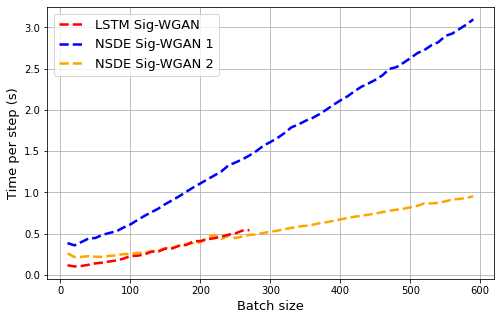

In [16]:
a = plt.plot(batch_size[:27], batch_size_time_lstmsig, label='LSTM Sig-WGAN', linewidth=2.5, zorder=4, ls='--', color='red')
a = plt.plot(batch_size, batch_size_time_nsde_1, label='NSDE Sig-WGAN 1', linewidth=2.5, zorder=2, ls='--', color='blue')
a = plt.plot(batch_size, batch_size_time_nsde_2, label='NSDE Sig-WGAN 2', linewidth=2.5, ls='--', color='orange')


a = plt.legend(fontsize=13)
a = plt.grid()
a = plt.xlabel('Batch size', fontsize=13)
a = plt.ylabel('Time per step (s)', fontsize=13)